In [19]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Load and preprocess the data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()  # cifar10 is a dataset
train_images, test_images = train_images / 255.0, test_images / 255.0   # normalising the images with same size


In [21]:
# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [22]:
# Build the CNN model 
model = models.Sequential([                       #This initializes a Sequential model, which is a linear stack of layers.
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                                                 #Conv2D(32, (3, 3)): This adds a 2D convolutional layer with 32 filters, each of size 3x3.
                                                 #activation='relu': Uses the ReLU (Rectified Linear Unit) activation function
                                                 #input_shape=(32, 32, 3): Specifies the shape of the input data, which is 32x32 pixels with 3 color channels (RGB)
    layers.MaxPooling2D((2, 2)),                 #This adds a max pooling layer with a pool size of 2x2. 
    layers.Conv2D(64, (3, 3), activation='relu'),#This adds another convolutional layer with 64 filters, each of size 3x3, followed by ReLU activation.
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),                          #This flattens the 3D output from the previous layer into a 1D vector, preparing it for the fully connected (dense) layers
    layers.Dense(64, activation='relu'),       #This adds a fully connected (dense) layer with 64 units and ReLU activation. Dense layers are used to perform classification based on the features extracted by the convolutional layers.
    layers.Dense(10)                           #This adds the final dense layer with 10 units. Each unit corresponds to one of the 10 classes in the CIFAR-10 dataset
])


In [23]:
# Compile the model
model.compile(optimizer='adam',          #Adam Optimizer: Adam stands for Adaptive Moment Estimation. It is an optimization algorithm that adjusts the learning rate based on the first and 
                                          #second moments of the gradients (mean and uncentered variance). Adam is popular because it often works well with little tuning.    
                                          #Purpose: The optimizer is responsible for updating the model’s weights based on the gradients computed during backpropagation
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),#Sparse Categorical Crossentropy is used to measure the model’s prediction error for multi-class classification tasks. The from_logits=True parameter indicates that the model outputs raw logits.
metrics=['accuracy'])       #Metrics: Accuracy is used to monitor the fraction of correctly classified instances during training and evaluation

In [24]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))



Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - accuracy: 0.3557 - loss: 1.7552 - val_accuracy: 0.5484 - val_loss: 1.2605
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.5680 - loss: 1.2161 - val_accuracy: 0.6076 - val_loss: 1.1113
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6268 - loss: 1.0561 - val_accuracy: 0.6318 - val_loss: 1.0488
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.6710 - loss: 0.9409 - val_accuracy: 0.6575 - val_loss: 0.9713
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6935 - loss: 0.8730 - val_accuracy: 0.6773 - val_loss: 0.9252
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7157 - loss: 0.8141 - val_accuracy: 0.6648 - val_loss: 0.9653
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7346 - loss: 0.7594 - val_accuracy: 0.6849 - val_loss: 0.9235
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7567 -

In [25]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 2s - 6ms/step - accuracy: 0.7059 - loss: 0.8814
Test accuracy: 0.7059000134468079


In [26]:
# Function to load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image
    return img_array
                                                                                   #Loads an image from the specified file path.
                                                                                   # Resizes the image to 32x32 pixels.
                                                                                   # Converts the image to a NumPy array.
                                                                                   #Adds a batch dimension to the array.
                                                                                   #Normalizes the pixel values to the range [0, 1].

In [27]:
# Function to predict the class of the image
def predict_image_class(img_path, model, class_names):
    img_array = load_and_preprocess_image(img_path)
    predictions = model.predict(img_array)                                           
    predicted_class = np.argmax(predictions[0])
    predicted_class_name = class_names[predicted_class]
    return predicted_class_name, predictions[0][predicted_class]
                                                                        #Loads and preprocesses an image from a given path.
                                                                         #Uses a trained model to predict the class of the image.
                                                                         #Finds the class with the highest prediction score.
                                                                        #Returns the name of the predicted class and the confidence score of the prediction

In [28]:
# Function to display the image with prediction
def display_image_with_prediction(img_path, predicted_class_name, confidence):
    img = image.load_img(img_path, target_size=(32, 32))
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class_name} ({confidence:.2f})")
    plt.axis('off')
    plt.show()
                                                                                   #Loads and resizes an image from a given path.
                                                                                   #Displays the image using Matplotlib.
                                                                                   #Sets the title of the plot to show the predicted class name and confidence score.
                                                                                  #Hides the plot axes for a cleaner display.
                                                                                #Renders and shows the plot.

In [29]:
# Path to your image
img_path = r'C:\Users\DELL\Downloads\cat.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Predicted class: cat with confidence: 1.98


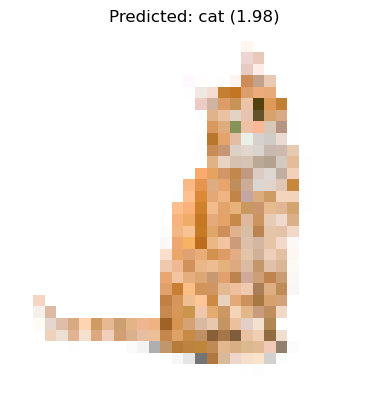

In [30]:
# Predict and display the image with prediction
predicted_class_name, confidence = predict_image_class(img_path, model, class_names)
print(f"Pr_cledicted class: {predictedass_name} with confidence: {confidence:.2f}")
display_image_with_prediction(img_path, predicted_class_name, confidence)

In [31]:
# Path to your image
img_path = r'C:\Users\DELL\Downloads\parrot.jpg'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted class: bird with confidence: 4.15


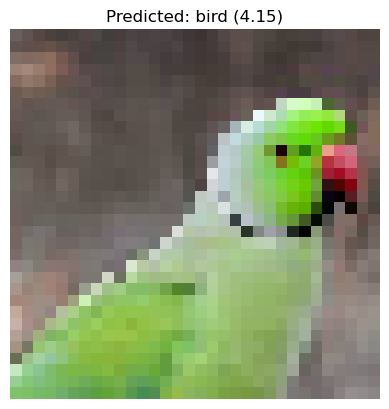

In [32]:
# Predict and display the image with prediction
predicted_class_name, confidence = predict_image_class(img_path, model, class_names)
print(f"Predicted class: {predicted_class_name} with confidence: {confidence:.2f}")
display_image_with_prediction(img_path, predicted_class_name, confidence)